# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the Dataset

In [2]:
data = pd.read_csv('dataset.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Variable analysis

In [3]:
cdata = data.copy()

In [4]:
cdata.isnull().sum()

Hours     0
Scores    0
dtype: int64

### We can see that the dataset doesn't contain any missing values

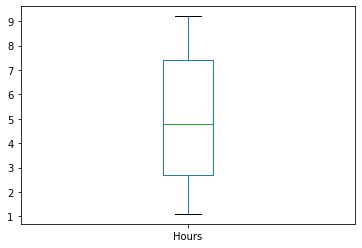

In [5]:
cdata['Hours'].plot.box()

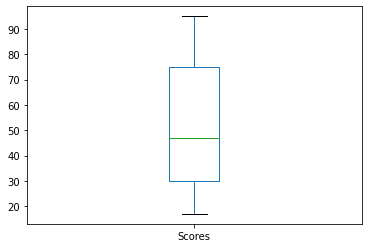

In [6]:
cdata['Scores'].plot.box()

### We can also see that there's no outliers in our dataset

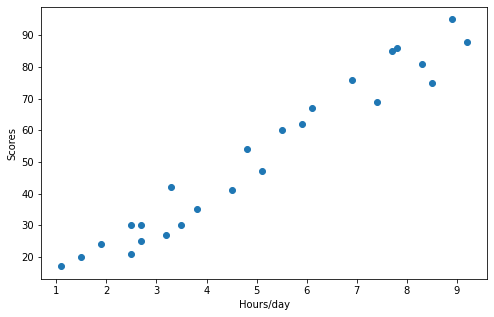

In [7]:
plt.figure(figsize=(8,5))
plt.scatter(cdata['Hours'], cdata['Scores'], marker='o')
plt.xlabel('Hours/day')
plt.ylabel('Scores')
plt.show()

## From the scatter plot we can clearly see that a linear regression model would be a best fit.

In [8]:
# Now we have split our data into Input and Ouput.

x = cdata.iloc[:, :-1].values  
y = cdata.iloc[:, 1].values 

In [9]:
# Now we split further more as train and test datasets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=143)

# Training our Model

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
# By setting the normalize to True, we are scaling the values which we use to train our model.

model = LinearRegression(normalize=True)

In [12]:
model.fit(x_train,y_train)

LinearRegression(normalize=True)

### Now we have trained our model, we can visualize our model

In [13]:
weight = model.coef_
bias = model.intercept_

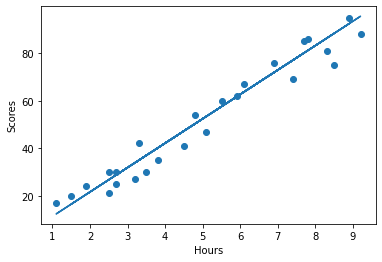

In [14]:
plt.scatter(x,y)
y_hat = weight * x + bias
plt.plot(x,y_hat)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

## Let's make some predictions

In [15]:
# First we will do with the test dataset

results = model.predict(x_test)
pred_df = pd.DataFrame({'Targets':y_test, 'Predicted Score':results})
pred_df

,Targets,Predicted Score
0,75,88.356418
1,30,28.763200
2,54,50.340055
3,30,26.708261
4,88,95.548703
5,41,47.257647
6,30,36.982954


In [16]:
# Now let's see the predicted score of the given student

Hours = [[9.25]]
pred = model.predict(Hours)

Ex_DF = pd.DataFrame({'Hours/day':9.25, 'Predicted Score':pred})
Ex_DF

,Hours/day,Predicted Score
0,9.25,96.062438


In [17]:
from sklearn.metrics import *

In [18]:
r2_score(y_test, results)

0.8962815524604862

## We are getting $R^2$ Score as 90% apprx.